<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/Parabolic_SAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing required libraries
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


In [3]:
infy=pd.read_csv('/content/INFY.NS.csv')
print(infy.shape)

infy.index = infy["Date"].apply(lambda x: pd.Timestamp(x))
infy.drop("Date", axis=1, inplace=True)
infy.head()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,570.500000,574.775024,560.650024,568.575012,516.459229,8072702
2018-04-03,567.349976,571.775024,564.049988,570.224976,517.957886,4077168
2018-04-04,572.000000,572.275024,560.000000,562.099976,510.577576,4813302
2018-04-05,569.775024,575.650024,564.549988,573.775024,521.182556,7763544
2018-04-06,571.500000,573.000000,561.049988,563.500000,511.849365,5937742


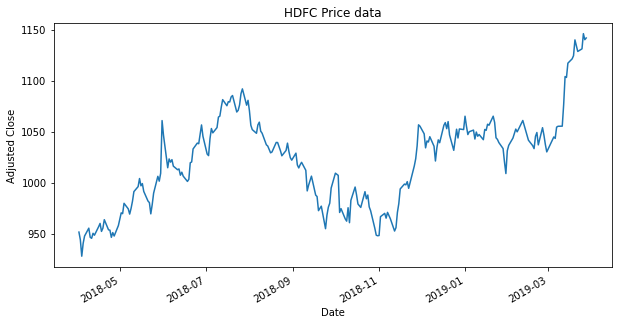

In [13]:
#Visually show the stock price
hdfc['Adj Close'].plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("HDFC Price data")
plt.show()

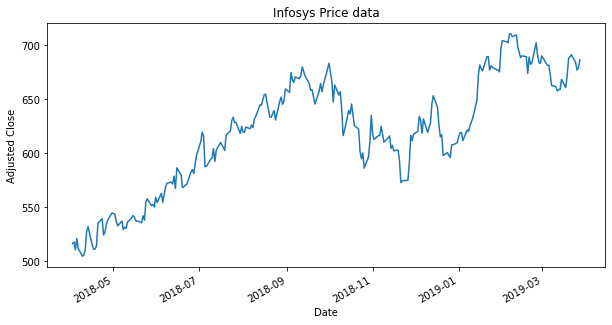

In [14]:
#Visually show the stock price
infy['Adj Close'].plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Infosys Price data")
plt.show()

In [ ]:
!pip install yfinance
!pip install ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [11]:
# Import talib
import yfinance as yf
import talib

#HDFC Calculation

In [ ]:
# Calculate parabolic sar
hdfc['SAR'] = talib.SAR(hdfc.High, hdfc.Low, acceleration=0.02, maximum=0.2)

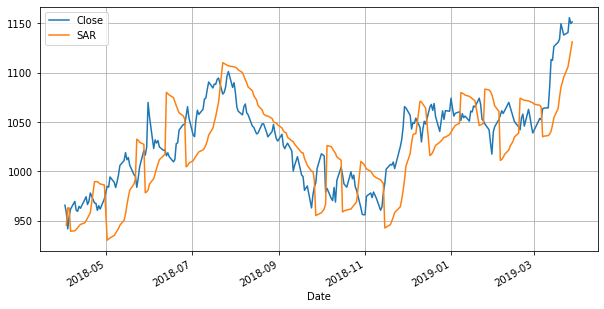

In [12]:
# Plot Parabolic SAR with close price
hdfc[['Close', 'SAR']][:500].plot(figsize=(10,5))
plt.grid()
plt.show()

In [17]:
def psar(barsdata, iaf = 0.02, maxaf = 0.2):
    length = len(barsdata)
    dates = list(barsdata.index)
    high = list(barsdata['High'])
    low = list(barsdata['Low'])
    close = list(barsdata['Close'])
    psar = close[0:len(close)]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = low[0]
    hp = high[0]
    lp = low[0]
    
    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        
        reverse = False
        
        if bull:
            if low[i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = low[i]
                af = iaf
        else:
            if high[i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = high[i]
                af = iaf
    
        if not reverse:
            if bull:
                if high[i] > hp:
                    hp = high[i]
                    af = min(af + iaf, maxaf)
                if low[i - 1] < psar[i]:
                    psar[i] = low[i - 1]
                if low[i - 2] < psar[i]:
                    psar[i] = low[i - 2]
            else:
                if low[i] < lp:
                    lp = low[i]
                    af = min(af + iaf, maxaf)
                if high[i - 1] > psar[i]:
                    psar[i] = high[i - 1]
                if high[i - 2] > psar[i]:
                    psar[i] = high[i - 2]
                    
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]

    return {"dates":dates, "high":high, "low":low, "close":close, "psar":psar, "psarbear":psarbear, "psarbull":psarbull}

In [20]:
startidx = 0
endidx = len(hdfc)
      
result = psar(hdfc)
dates = result['dates'][startidx:endidx]
close = result['close'][startidx:endidx]
psarbear = result['psarbear'][startidx:endidx]
psarbull = result['psarbull'][startidx:endidx]
      

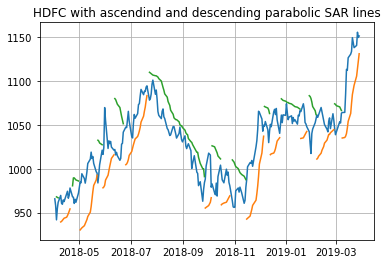

In [22]:
plt.plot(dates, close)
plt.plot(dates, psarbull)
plt.plot(dates, psarbear)

plt.title("HDFC with ascending and descending parabolic SAR lines")
plt.grid()
plt.show()

#INFOSYS Calculation

In [24]:
# Calculate parabolic sar
infy['SAR'] = talib.SAR(infy.High, infy.Low, acceleration=0.02, maximum=0.2)

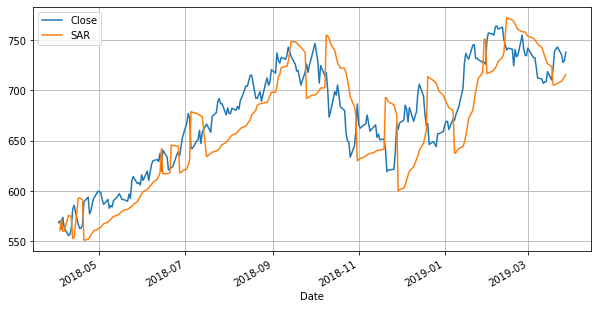

In [25]:
# Plot Parabolic SAR with close price
infy[['Close', 'SAR']][:500].plot(figsize=(10,5))
plt.grid()
plt.show()

In [26]:
startidx = 0
endidx = len(infy)
      
result = psar(infy)
dates = result['dates'][startidx:endidx]
close = result['close'][startidx:endidx]
psarbear = result['psarbear'][startidx:endidx]
psarbull = result['psarbull'][startidx:endidx]

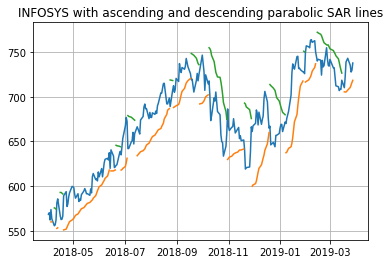

In [27]:
plt.plot(dates, close)
plt.plot(dates, psarbull)
plt.plot(dates, psarbear)

plt.title("INFOSYS with ascending and descending parabolic SAR lines")
plt.grid()
plt.show()